In [1]:
import json 
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

In [24]:
bits = "8" # "8" or "4"
model_name = ["mistralai/Mixtral-8x22B-Instruct-v0.1", #0
              "01-ai/Yi-1.5-9B-Chat", #1
              "mistralai/Mixtral-8x7B-Instruct-v0.1", #2
              "Qwen/Qwen1.5-7B-Chat", #3
              "meta-llama/Meta-Llama-3-8B-Instruct", #4
              "meta-llama/Meta-Llama-3.1-8B-Instruct"] #5

i = 0
all_results=[]

with open("./gridsearch_output/"+model_name[4]+"_on_tcp_60h.jsonl", "r") as f:
    for idx, line in enumerate(f):
        line = json.loads(line)
        all_results.append(line)

results=[]
param = all_results[0]["parameters"]
for idx, result in enumerate(all_results):
    if result["parameters"]==param:
        continue
    else:
        break

cers_model=[]
cers_input=[]
cers_model_median=[]
cers_input_median=[]
cer_m=0
cer_i=0
median_m=[]
median_i=[]

improvement = []
improvement_median = []
imp = 0

for i, result in enumerate(all_results):
    if (i+1)%idx!=0:
        cer_m+=result["scores"]["model_vs_GT"]["cer"]
        cer_i+=result["scores"]["input_vs_GT"]["cer"]
        median_m.append(result["scores"]["model_vs_GT"]["cer"])
        median_i.append(result["scores"]["input_vs_GT"]["cer"])
        imp += max(min((result["scores"]["input_vs_GT"]["cer"]-result["scores"]["model_vs_GT"]["cer"])/result["scores"]["input_vs_GT"]["cer"], 1),-1)
        continue
    else:
        results.append(result)
        cers_model.append(cer_m/idx)
        cers_input.append(cer_i/idx)

        median_m.sort()
        median_i.sort()
        cers_model_median.append(median_m[idx//2])
        cers_input_median.append(median_i[idx//2])
        
        improvement.append(imp/idx)
        improvement_median.append(max(min((median_i[idx//2]-median_m[idx//2])/median_i[idx//2], 1),-1))

        median_m=[]
        median_i=[]
        cer_m=0
        cer_i=0
        imp=0


In [25]:
print(cers_input_median)

[0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.0816326530

In [26]:
#print(cers_model_median)
#print(cers_model)

print([improvement_median[i]-improvement[i] for i in range(len(cers_model))])

[-0.0775472751306997, 0.03969773129098864, -0.07417304404328356, 0.009041855059923637, -0.16873189653557608, -0.2599477563918804, -0.19339799505947802, -0.06908637869759496, -0.5390830766498287, -0.1284178036131357, -0.09095290159319692, -0.1108513175764493, -0.09141839518656009, -0.029635074345534015, -0.12968342908685188, 0.014295578527037833, -0.4080282356351246, -0.03651319650282765, -0.002809171667483415, -0.054272887869383085, 0.035273181298038414, -0.04952267663228409, -0.10225796111195493, -0.08616012840522617, -0.005207026220714811, -0.032230207747693196, -0.47867076808054154, 0.04706100286962127, -0.0032213797509634684, -0.046453684031737955, -0.10095228091356817, 0.005751412886020532, 0.024172422004806904, -0.09252213803399408, -0.06334613876343784, -0.15748160632509145, 0.018315960775506374, 0.040630464552324996, -0.05264907677810142, -0.15707087747216242, -0.12189059943220988, -0.01374048228051844, -0.04000919961370518, -0.08724917950546751, -0.060492399687384624, -0.09665

In [27]:
window_size = []
mirostat_tau=[]
extend_gap_score=[]
open_gap_score=[]
temperature=[]
overlap_percentage=[]

lowest_score = 1
lowest_score_index = 0

for index, elt in enumerate(results):
    try:
        overlap_percentage.append(elt["parameters"]["overlap_percentage"])
        extend_gap_score.append(elt["parameters"]["extend_gap_score"])
        open_gap_score.append(elt["parameters"]["open_gap_score"])
        mirostat_tau.append(elt["parameters"]["mirostat_tau"])
        temperature.append(elt["parameters"]["temperature"]) 
        window_size.append(elt["parameters"]["window_size"])
    except:
        None

<bound method Series.max of 0     0.061418
1     0.011203
2     0.086538
3     0.121031
4    -0.831268
        ...   
95    0.115893
96    0.122184
97    0.105746
98    0.128600
99    0.025141
Name: improvement, Length: 100, dtype: float64>


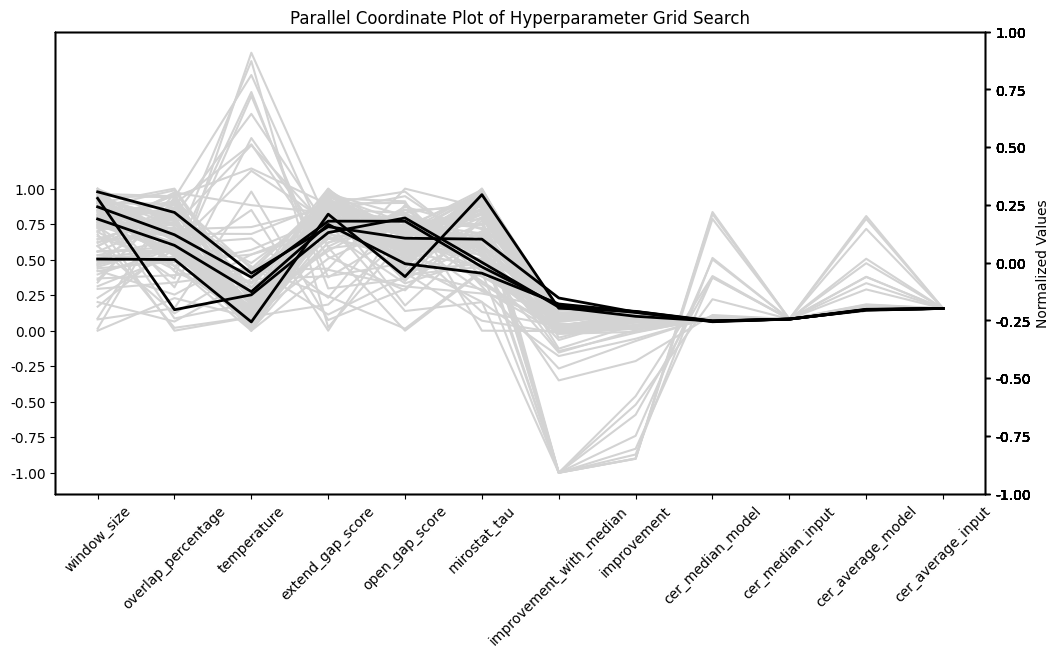

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample data representing the hyperparameter grid search results
data = {
    'window_size': window_size,
    'overlap_percentage': overlap_percentage,
    'temperature': temperature,
    'extend_gap_score': extend_gap_score,
    'open_gap_score': open_gap_score, 
    'mirostat_tau': mirostat_tau,
    #'character_error_rate': cers_model, 
    'improvement_with_median': improvement_median, 
    'improvement': improvement,
    'cer_median_model': cers_model_median,
    'cer_median_input': cers_input_median,
    'cer_average_model': cers_model, 
    'cer_average_input': cers_input
}

'''print(len(window_size))
print(len(do_sample))
print(len(temperature))
print(len(beam_search))
print(len(num_beams))
print(len(wer))
print(len(coverage_avg))'''

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)
#print(df)
# Normalize the data for plotting purposes
df_normalized = df.copy()
maxVal = 1.0
df_normalized['improvement'].where(df_normalized['improvement'] <= maxVal, maxVal)

print(df_normalized['improvement'].max)
for column in df_normalized.columns:
    if (((df_normalized[column].dtype != bool  and column !='coverage') and 'improvement' not in column) and 'cer' not in column) and column != 'temperature':
        df_normalized[column] = (df_normalized[column] - df_normalized[column].min()) / (df_normalized[column].max() - df_normalized[column].min())

# Define a function to convert boolean to int for plotting
#df_normalized['do_sample'] = df_normalized['do_sample'].astype(int)
#df_normalized['beam_search'] = df_normalized['beam_search'].astype(int)

# Sort the DataFrame based on character error rate
df_sorted = df_normalized.sort_values(by='improvement_with_median', ascending=False)

# Split the DataFrame into two parts
df_grey = df_sorted[5:]
df_black = df_sorted[:5]

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the grey lines first
for i in range(len(df_grey)):
    ax.plot(df_grey.columns, df_grey.iloc[i], color='lightgrey')

# Plot the black lines on top
for i in range(len(df_black)):
    ax.plot(df_black.columns, df_black.iloc[i], color='black', linewidth=2)

# Customize the axis labels to show actual values
for i, column in enumerate(df.columns):
    values = df[column]
    normalized_values = df_normalized[column]
    tick_positions = np.linspace(-1, 1, num=9)
    tick_labels = np.linspace(-1, 1, num=9)

    # Set the x-axis ticks and labels
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_xticklabels(df.columns, rotation=45)

    # Set the y-axis ticks and labels on the left
    ax.set_yticks(tick_positions)
    ax.set_yticklabels([f"{label:.2f}" for label in tick_labels])

    # Create a secondary y-axis on the right, which shares the same y-axis data
    ax_right = ax.twinx()

    # Set the right y-axis ticks and labels (identical to the left)
    ax_right.set_yticks(tick_positions)
    ax_right.set_yticklabels([f"{label:.2f}" for label in tick_labels])

    # Optional: Customize the appearance of both axes
    ax.tick_params(axis='y', labelsize=10, direction='out')
    ax_right.tick_params(axis='y', labelsize=10, direction='out')




# Label the plot
plt.title('Parallel Coordinate Plot of Hyperparameter Grid Search')
plt.xlabel('Parameters')
plt.ylabel('Normalized Values')

plt.show()


In [29]:
print(df_black)

    window_size  overlap_percentage  temperature  extend_gap_score  \
58     0.977597            0.832329     0.404471          0.732172   
74     0.786151            0.600735     0.274617          0.748026   
70     0.871690            0.675284     0.376254          0.770933   
56     0.931772            0.147475     0.252522          0.690514   
78     0.504073            0.500901     0.061702          0.820352   

    open_gap_score  mirostat_tau  improvement_with_median  improvement  \
58        0.650907      0.644383                 0.230145     0.130399   
74        0.471453      0.404477                 0.187921     0.134446   
70        0.770588      0.448944                 0.177987     0.128823   
56        0.793614      0.481067                 0.165580     0.101131   
78        0.380514      0.957803                 0.157938     0.136054   

    cer_median_model  cer_median_input  cer_average_model  cer_average_input  
58          0.062845          0.081633           0.1465

/usr/local/lib64/python3.9/site-packages/sklearn/preprocessing/_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(


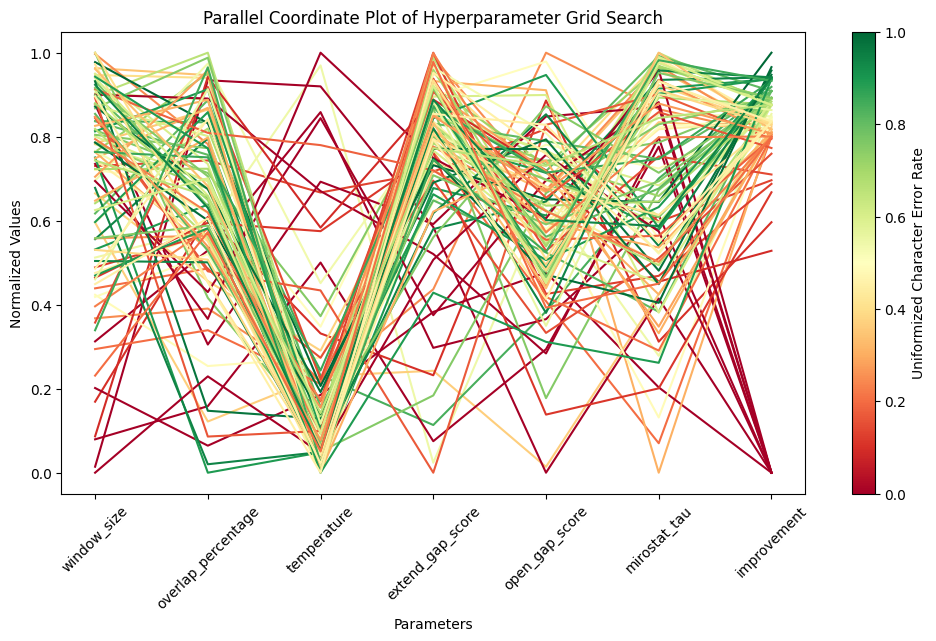

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import QuantileTransformer
import matplotlib.colors as mcolors
# Sample data representing the hyperparameter grid search results
data = {
    'window_size': window_size,
    'overlap_percentage': overlap_percentage,
    'temperature': temperature,
    'extend_gap_score': extend_gap_score,
    'open_gap_score': open_gap_score, 
    'mirostat_tau': mirostat_tau,
    'improvement': improvement_median, 
    
}


# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# Normalize the data (excluding boolean columns) for better visualization
for column in df.columns:
    if df[column].dtype != bool:
        df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

# Define a function to convert boolean to int for plotting
#df_normalized['do_sample'] = df_normalized['do_sample'].astype(int)
#df_normalized['beam_search'] = df_normalized['beam_search'].astype(int)


# Use QuantileTransformer to normalize the character error rate
quantile_transformer = QuantileTransformer(output_distribution='uniform')
df['improvement_normalized'] = quantile_transformer.fit_transform(df[['improvement']])

# Determine the colors based on the normalized character error rate
norm = plt.Normalize(df['improvement_normalized'].min(), df['improvement'].max())
colors = plt.cm.RdYlGn(norm(df['improvement_normalized']))

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the parallel coordinates
for i in range(len(df)):
    ax.plot(df.columns[:-1], df.iloc[i, :-1], color=colors[i])

# Add colorbar for reference
sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='Uniformized Character Error Rate')

# Label the axes
plt.xticks(rotation=45)
plt.title('Parallel Coordinate Plot of Hyperparameter Grid Search')
plt.xlabel('Parameters')
plt.ylabel('Normalized Values')

plt.show()
